### Data Cleaning/Preliminary feature engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
historical_data = pd.read_csv('C:/Users/weila/Desktop/datasets_doordash/datasets/historical_data.csv')
historical_data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [3]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [4]:
historical_data['created_at'] = pd.to_datetime(historical_data['created_at'])
historical_data['actual_delivery_time'] = pd.to_datetime(historical_data['actual_delivery_time'])

In [5]:
# create the target variable for regression
from datetime import datetime
historical_data['actual_total_delivery_duration'] = (historical_data['actual_delivery_time'] - historical_data['created_at']).dt.seconds


In [6]:
historical_data['busy_dasher_ratio'] = historical_data['total_busy_dashers'] / historical_data['total_onshift_dashers']

In [7]:
historical_data['estimated_non_prep_duration'] = historical_data['estimated_store_to_consumer_driving_duration'] + historical_data['estimated_order_place_duration']

In [8]:
# check the ids and decide whether to encode or not
historical_data['market_id'].nunique()

6

In [9]:
historical_data['store_id'].nunique()

6743

In [10]:
historical_data['order_protocol'].nunique()

7

In [11]:
# create dummies for order protocol
order_protocol_dummies = pd.get_dummies(historical_data.order_protocol)
order_protocol_dummies = order_protocol_dummies.add_prefix('order_protocol_')
order_protocol_dummies.head()

,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [12]:
# create dummies for market_id
market_id_dummies = pd.get_dummies(historical_data.market_id)
market_id_dummies = market_id_dummies.add_prefix('market_id_')
market_id_dummies.head()

,market_id_1.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [13]:
# create dictionary with most repeated categories of each store to fill nan rows where it is possible
store_id_unique = historical_data['store_id'].unique().tolist()
store_id_and_category = {store_id : historical_data[historical_data.store_id == store_id].store_primary_category.mode() for store_id in store_id_unique}

In [14]:
def fill(store_id):
    try:
        return store_id_and_category[store_id].values[0]
    except:
        return np.nan

# fill null values
historical_data['nan_free_primary_category'] = historical_data.store_id.apply(fill)

In [15]:
# create dummies for store primary category
store_primary_category_dummies = pd.get_dummies(historical_data.nan_free_primary_category)
store_primary_category_dummies = store_primary_category_dummies.add_prefix('category_')
store_primary_category_dummies.head()

,category_afghan,category_african,category_alcohol,category_alcohol-plus-food,category_american,category_argentine,category_asian,category_barbecue,category_belgian,category_brazilian,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
train_df = historical_data.drop(columns = ['created_at', 'market_id', 'store_id', 'store_primary_category', 'actual_delivery_time', 'nan_free_primary_category','order_protocol'])
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dasher_ratio,estimated_non_prep_duration
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,0.424242,1307.0
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,2.000000,1136.0
2,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,0.000000,1136.0
3,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,1.000000,735.0
4,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1.000000,1096.0


In [17]:
train_df = pd.concat([train_df, order_protocol_dummies, market_id_dummies, store_primary_category_dummies], axis=1)

In [18]:
train_df = train_df.astype('float32')
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,446.0,861.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0,446.0,289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,6.0,6.0,9.0,446.0,650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
train_df.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
count,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000,...,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000
mean,3.196391,2682.331543,2.670791,686.218506,1159.588623,44.808094,41.739746,58.050064,308.560181,545.358948,...,0.000815,0.000187,0.005465,0.011300,0.000740,0.037254,0.001175,0.001433,0.004234,0.030928
std,2.665833,1822.968994,1.629398,522.068542,558.358337,34.524193,32.146065,52.657368,90.211159,219.350143,...,0.028535,0.013687,0.073625,0.105705,0.027175,0.189502,0.034246,0.037816,0.064904,0.173167
min,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
train_df['busy_dasher_ratio'].describe()

count    1.775900e+05
mean              NaN
std               NaN
min              -inf
25%      8.269231e-01
50%      9.622642e-01
75%      1.000000e+00
max               inf
Name: busy_dasher_ratio, dtype: float64

In [21]:
np.where(np.any(~np.isfinite(train_df),axis=0)==True)

(array([ 5,  6,  7,  9, 10, 11, 12], dtype=int64),)

In [22]:
train_df.replace([np.inf, -np.inf], np.nan, inplace = True)
train_df.dropna(inplace = True)

In [23]:
train_df.shape

(177070, 100)

### Collinearity

In [30]:
corr = train_df.corr()

In [31]:
mask = np.triu(np.ones_like(corr, dtype=bool))

<Axes: >

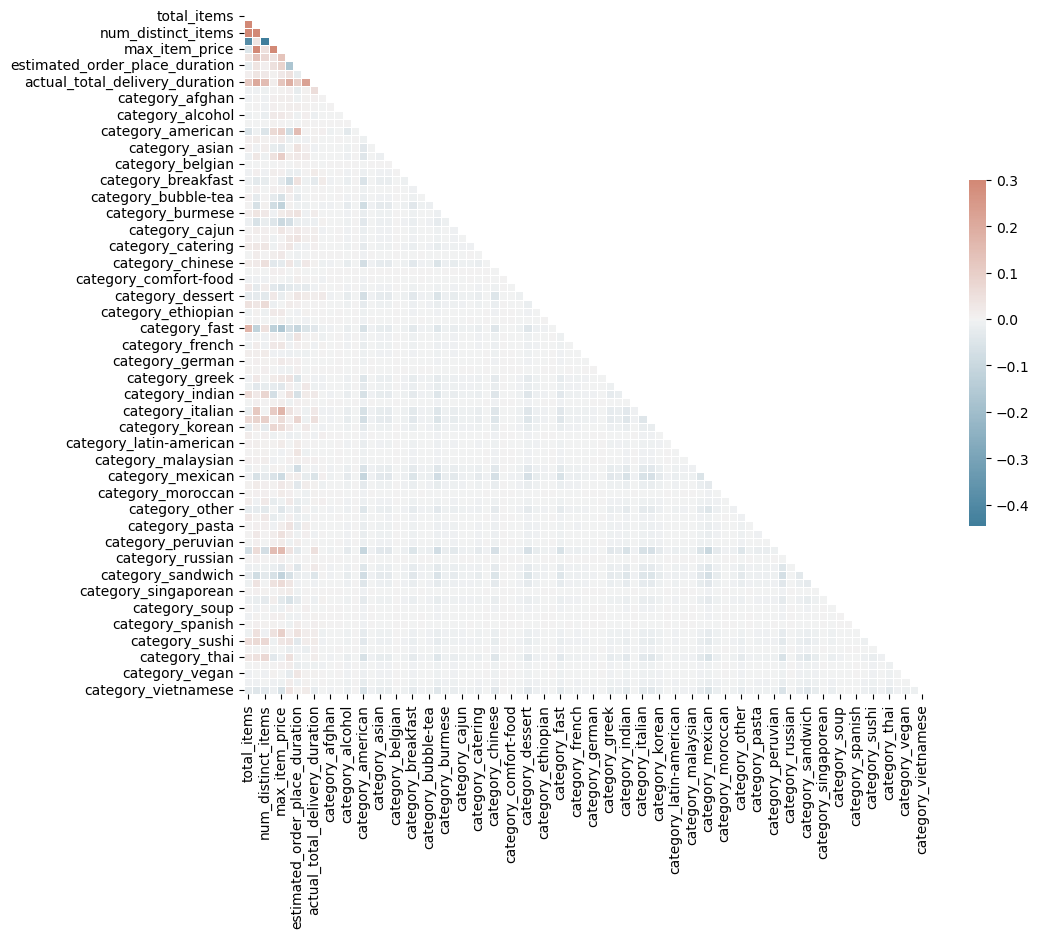

In [32]:
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,center=0, square=True,linewidth=.5,cbar_kws={'shrink':.5})

In [33]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i],cols[j]))
    return pairs_to_drop

In [34]:
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [35]:
print('Top Absolute Correlations')
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
total_items                                   num_distinct_items                0.758146
subtotal                                      num_distinct_items                0.682890
total_items                                   subtotal                          0.557175
min_item_price                                max_item_price                    0.541241
subtotal                                      max_item_price                    0.507947
num_distinct_items                            min_item_price                    0.446733
total_items                                   min_item_price                    0.389277
estimated_store_to_consumer_driving_duration  actual_total_delivery_duration    0.224065
subtotal                                      actual_total_delivery_duration    0.204511
total_outstanding_orders                      actual_total_delivery_duration    0.187416
                                              estimated_order_place_duration    0.17

In [36]:
train_df = historical_data.drop(columns = ['created_at', 'market_id', 'store_id', 'store_primary_category', 'actual_delivery_time', 'nan_free_primary_category','order_protocol'])

In [37]:
train_df = pd.concat([train_df,order_protocol_dummies,store_primary_category_dummies],axis=1)
train_df = train_df.drop(columns=['total_onshift_dashers','total_busy_dashers','category_indonesian','estimated_non_prep_duration'])

train_df = train_df.astype('float32')
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)

train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dasher_ratio,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,3779.0,0.424242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,4024.0,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,0.0,446.0,690.0,1781.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,2.0,446.0,289.0,3075.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,9.0,446.0,650.0,2390.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
train_df.shape

(177070, 90)

In [39]:
print('Top Absolute Correlations')
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
estimated_order_place_duration                order_protocol_1.0                0.897645
total_items                                   num_distinct_items                0.758146
subtotal                                      num_distinct_items                0.682890
total_items                                   subtotal                          0.557175
min_item_price                                max_item_price                    0.541241
subtotal                                      max_item_price                    0.507947
order_protocol_4.0                            category_fast                     0.489946
num_distinct_items                            min_item_price                    0.446733
total_items                                   min_item_price                    0.389277
order_protocol_1.0                            order_protocol_3.0                0.373581
estimated_order_place_duration                order_protocol_3.0                0.36

In [40]:
train_df = historical_data.drop(columns = ['created_at', 'market_id', 'store_id', 'store_primary_category', 'actual_delivery_time', 'nan_free_primary_category','order_protocol'])
train_df = pd.concat([train_df,store_primary_category_dummies],axis=1)
train_df = train_df.drop(columns=['total_onshift_dashers','total_busy_dashers','category_indonesian','estimated_non_prep_duration'])

train_df = train_df.astype('float32')
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)

train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dasher_ratio,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,3779.0,0.424242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,4024.0,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,0.0,446.0,690.0,1781.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,2.0,446.0,289.0,3075.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,9.0,446.0,650.0,2390.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
print('Top Absolute Correlation')
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlation
total_items                                   num_distinct_items                0.758146
subtotal                                      num_distinct_items                0.682890
total_items                                   subtotal                          0.557175
min_item_price                                max_item_price                    0.541241
subtotal                                      max_item_price                    0.507947
num_distinct_items                            min_item_price                    0.446733
total_items                                   min_item_price                    0.389277
estimated_store_to_consumer_driving_duration  actual_total_delivery_duration    0.224065
subtotal                                      actual_total_delivery_duration    0.204511
total_outstanding_orders                      actual_total_delivery_duration    0.187416
                                              estimated_order_place_duration    0.171

In [42]:
train_df['percent_distinct_item_of_total'] = train_df['num_distinct_items'] / train_df['total_items']
train_df['avg_price_per_item'] = train_df['subtotal']/train_df['total_items']
train_df.drop(columns=['num_distinct_items','subtotal'],inplace=True)
print('Top Absolute Correlations')
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
min_item_price                                avg_price_per_item                0.860580
max_item_price                                avg_price_per_item                0.770382
min_item_price                                max_item_price                    0.541241
total_items                                   percent_distinct_item_of_total    0.445751
                                              min_item_price                    0.389277
                                              avg_price_per_item                0.310759
percent_distinct_item_of_total                avg_price_per_item                0.226711
category_pizza                                avg_price_per_item                0.225510
estimated_store_to_consumer_driving_duration  actual_total_delivery_duration    0.224065
total_outstanding_orders                      actual_total_delivery_duration    0.187416
max_item_price                                percent_distinct_item_of_total    0.17

In [43]:
train_df['price_range_of_items'] = train_df['max_item_price'] - train_df['min_item_price']
train_df.drop(columns=['max_item_price','min_item_price'],inplace=True)
print('Top Absolute Correlation')
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlation
total_items                                   percent_distinct_item_of_total    0.445751
                                              price_range_of_items              0.333304
                                              avg_price_per_item                0.310759
percent_distinct_item_of_total                avg_price_per_item                0.226711
category_pizza                                avg_price_per_item                0.225510
estimated_store_to_consumer_driving_duration  actual_total_delivery_duration    0.224065
total_outstanding_orders                      actual_total_delivery_duration    0.187416
category_fast                                 avg_price_per_item                0.175950
total_outstanding_orders                      estimated_order_place_duration    0.171049
total_items                                   category_fast                     0.170988
category_italian                              avg_price_per_item                0.158

In [44]:
train_df.shape

(177070, 82)

### Multicollinearity

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
def compute_vif(features):
    vif_data = pd.DataFrame()
    vif_data['feature'] = features
    vif_data['VIF'] = [variance_inflation_factor(train_df[features].values, i) for i in range(len(features))]
    return vif_data.sort_values(by=['VIF']).reset_index(drop=True)

In [47]:
features = train_df.drop(columns=['actual_total_delivery_duration']).columns.to_list()
vif_data = compute_vif(features)
vif_data

,feature,VIF
0,category_alcohol-plus-food,1.000371
1,category_chocolate,1.000490
2,category_belgian,1.000750
3,category_russian,1.003227
4,category_african,1.003820
...,...,...
76,busy_dasher_ratio,6.369594
77,category_american,7.033601
78,estimated_store_to_consumer_driving_duration,7.210814
79,estimated_order_place_duration,13.472032


In [48]:
multicollinearity = True
while multicollinearity:
    highest_vif_feature = vif_data['feature'].values.tolist()[-1]
    print('I will remove', highest_vif_feature)
    features.remove(highest_vif_feature)
    vif_data = compute_vif(features)
    multicollinearity = False if len(vif_data[vif_data.VIF>=20])==0 else True

selected_features = vif_data['feature'].values.tolist()
vif_data

I will remove percent_distinct_item_of_total


,feature,VIF
0,category_alcohol-plus-food,1.000222
1,category_chocolate,1.000363
2,category_belgian,1.000451
3,category_russian,1.002018
4,category_gluten-free,1.002364
...,...,...
75,category_american,4.505926
76,avg_price_per_item,5.958957
77,busy_dasher_ratio,6.357885
78,estimated_store_to_consumer_driving_duration,7.192613


In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# use the selected features from the last step
x = train_df[selected_features]
y = train_df['actual_total_delivery_duration']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

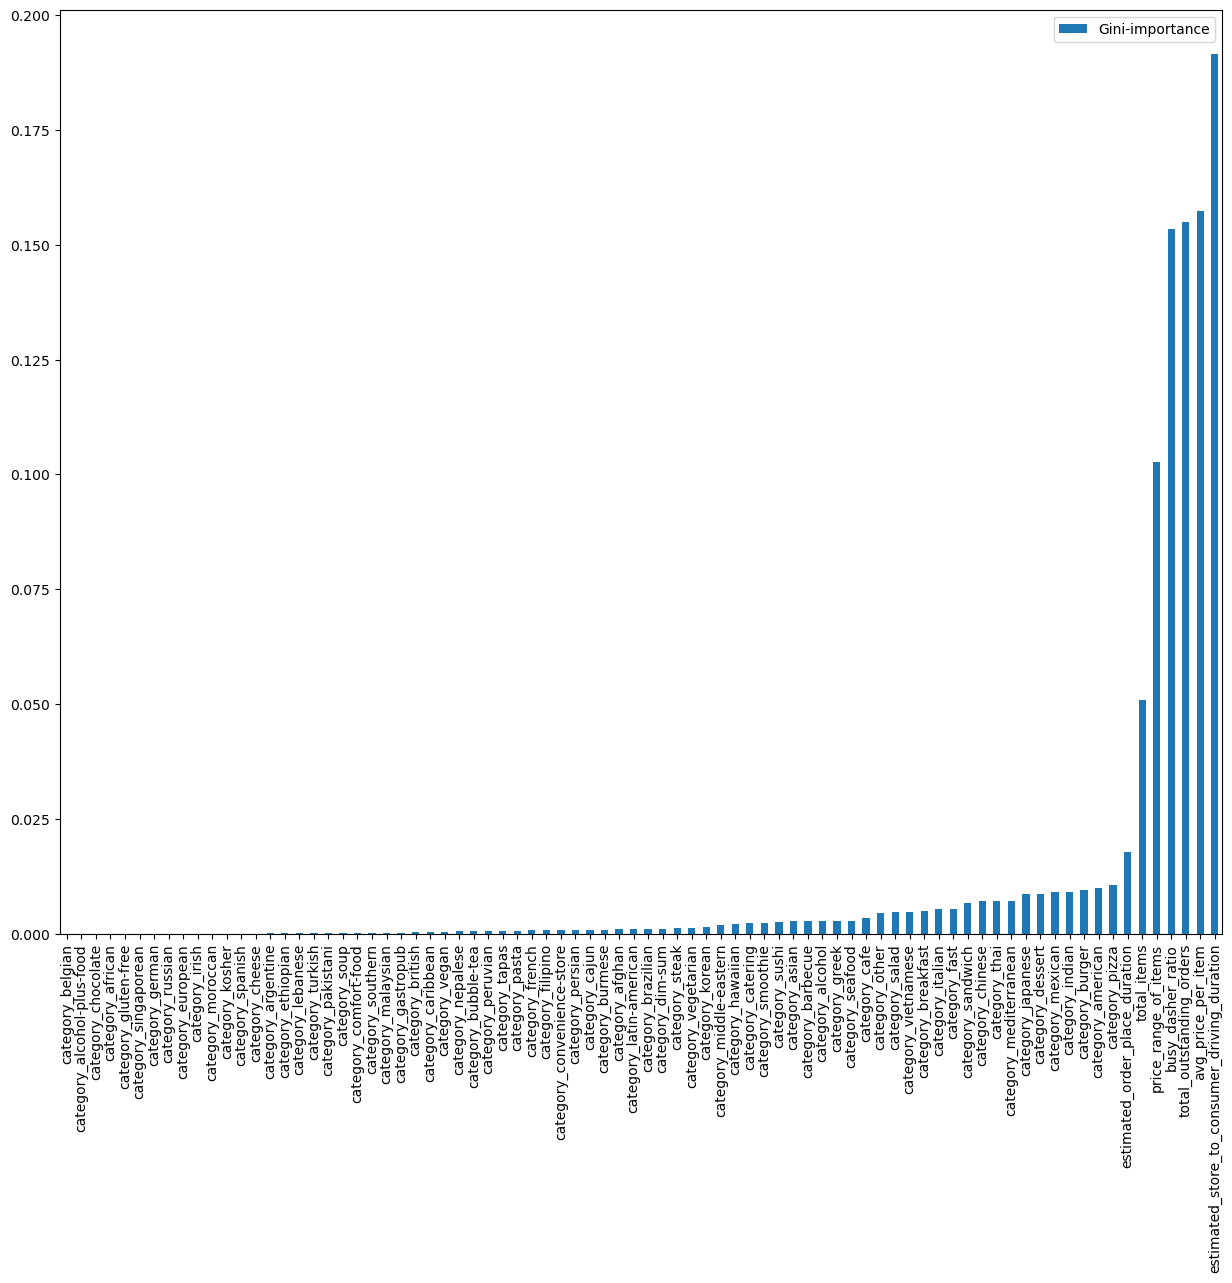

In [50]:
feature_names = [f'feature {i}' for i in range((x.shape[1]))]
forest = RandomForestRegressor(random_state = 42)
forest.fit(x_train, y_train)
feats = {}
#use a dictionary to store the Gini importance of each feature
for feature, importance in zip(x.columns, forest.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0:'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize=(15,12))
plt.show()

In [51]:
importances.sort_values(by='Gini-importance')[-35:].index.tolist()

['category_middle-eastern',
 'category_hawaiian',
 'category_catering',
 'category_smoothie',
 'category_sushi',
 'category_asian',
 'category_barbecue',
 'category_alcohol',
 'category_greek',
 'category_seafood',
 'category_cafe',
 'category_other',
 'category_salad',
 'category_vietnamese',
 'category_breakfast',
 'category_italian',
 'category_fast',
 'category_sandwich',
 'category_chinese',
 'category_thai',
 'category_mediterranean',
 'category_japanese',
 'category_dessert',
 'category_mexican',
 'category_indian',
 'category_burger',
 'category_american',
 'category_pizza',
 'estimated_order_place_duration',
 'total_items',
 'price_range_of_items',
 'busy_dasher_ratio',
 'total_outstanding_orders',
 'avg_price_per_item',
 'estimated_store_to_consumer_driving_duration']

C:\Users\weila\AppData\Local\Temp\ipykernel_18012\4285063339.py:11: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,81,1)


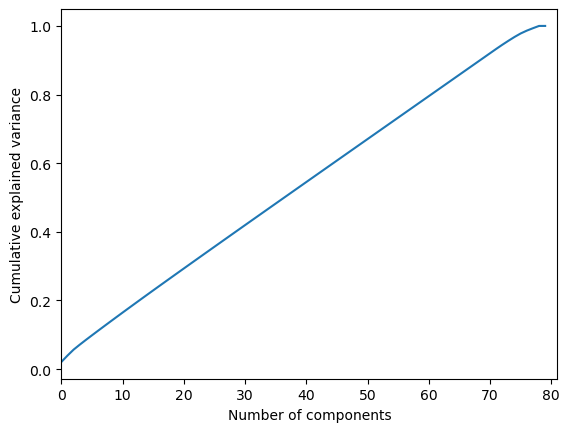

In [52]:
# PCA to determine important features
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
x_train = x_train.values
x_train = np.asarray(x_train)

# Find normalized array of x_train
x_std = StandardScaler().fit_transform(x_train)
pca = PCA().fit(x_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,81,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [53]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [54]:
def scale(scaler, x, y):
    x_scaler = scaler
    x_scaler.fit(X=x, y=y)
    x_scaled = x_scaler.transform(x)
    y_scaler = scaler
    y_scaler.fit(y.values.reshape(-1,1))
    y_scaled = y_scaler.transform(y.values.reshape(-1,1))
    
    return x_scaled, y_scaled, x_scaler, y_scaler

In [55]:
x_scaled, y_scaled, x_scaler, y_scaler = scale(MinMaxScaler(), x, y)

x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

In [56]:
from sklearn.metrics import mean_squared_error

def rmse_with_inv_transform(scaler, y_test, y_pred_scaled, model_name):
    y_predict = scaler.inverse_transform(y_pred_scaled.reshape(-1,1))
    rmse_error = mean_squared_error(y_test, y_predict[:,0], squared=False)
    print('Error = ''{}'.format(rmse_error)+' in '+model_name)
    return rmse_error, y_predict

### Choosing the best algorithm

In [57]:
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model

In [58]:
# Create a generic function which can work with multiple machine learning moduels
def make_regression(x_train, y_train, x_test, y_test, model, model_name, verbose=True):
    model.fit(x_train, y_train)
    y_predict = model.predict(x_train)
    train_error = mean_squared_error(y_train, y_predict, squared=False)
    y_predict = model.predict(x_test)
    test_error = mean_squared_error(y_test, y_predict, squared = False)
    if verbose:
        print('Train error = ''{}'.format(train_error)+' in '+model_name)
        print('Test error = ''{}'.format(test_error)+ ' in '+model_name)
    trained_model = model
    return trained_model, y_predict, train_error, test_error

In [59]:
pred_dict = {
    'regression_model':[],
    'feature_set':[],
    'scaler_name':[],
    'RMSE':[]
}

regression_models = {
    'Ridge': linear_model.Ridge(),
    'DecisionTree': tree.DecisionTreeRegressor(max_depth=6),
    'RandomForest': RandomForestRegressor(),
    'MLP': MLPRegressor()
}

feature_sets = {
    'full dataset':x.columns.to_list(),
    'selected_features_40': importances.sort_values(by='Gini-importance')[-40:]
.index.tolist(),
    'selected_features_20': importances.sort_values(by='Gini-importance')[-20:]
.index.tolist(),
    'selected_features_10': importances.sort_values(by='Gini-importance')[-10:]
.index.tolist()
}

scalers = {
    'Standard scaler':StandardScaler(),
    'MinMax scaler':MinMaxScaler(),
    'No scaler':None
}

In [60]:
for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]
    for scaler_name in scalers.keys():
        print(f'----scaled with {scaler_name}-----included columns are {feature_set_name}')
        print('')
        for model_name in regression_models.keys():
            if scaler_name == 'No scaler':
                x = train_df[feature_set]
                y = train_df['actual_total_delivery_duration']
                x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
                make_regression(x_train,y_train,x_test,y_test,regression_models[model_name],model_name,verbose=True)
            else:
                x_scaled, y_scaled, x_scaler, y_scaler = scale(scalers[scaler_name],x[feature_set],y)
                x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(x_scaled, y_scaled, test_size=0.2,random_state=42)
                #TODO: check how is this used
                _,y_predict_scaled,_,_ = make_regression(x_train_scaled,y_train_scaled[:,0],x_test_scaled,y_test_scaled,regression_models[model_name],model_name,verbose=True)
                rmse_error, y_predict = rmse_with_inv_transform(y_scaler, y_test,y_predict_scaled,model_name)
            pred_dict['regression_model'].append(model_name)
            pred_dict['feature_set'].append(feature_set_name)
            pred_dict['scaler_name'].append(scaler_name)
            pred_dict['RMSE'].append(rmse_error)
            


----scaled with Standard scaler-----included columns are full dataset

Train error = 0.9184321165084839 in Ridge
Test error = 0.9763153791427612 in Ridge
Error = 1139.0242919921875 in Ridge
Train error = 0.9152496352670425 in DecisionTree
Test error = 0.9819799988955717 in DecisionTree
Error = 1145.6329120486123 in DecisionTree
Train error = 0.34209927002173685 in RandomForest
Test error = 0.9699846123788066 in RandomForest
Error = 1131.6384219822346 in RandomForest
Train error = 0.8832451105117798 in MLP
Test error = 0.9523274302482605 in MLP
Error = 1111.03857421875 in MLP
----scaled with MinMax scaler-----included columns are full dataset

Train error = 0.014644085429608822 in Ridge
Test error = 0.015570812858641148 in Ridge
Error = 1139.4876708984375 in Ridge
Train error = 0.014590966557290974 in DecisionTree
Test error = 0.015654786060524128 in DecisionTree
Error = 1145.6329115437738 in DecisionTree
Train error = 0.005451108755765953 in RandomForest
Test error = 0.0154713745286558

C:\Users\weila\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.42538e-11): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train error = 1067.7815291116704 in DecisionTree
Test error = 1145.632912356856 in DecisionTree
Train error = 396.53406347912613 in RandomForest
Test error = 1130.7583114800157 in RandomForest
Train error = 1059.507080078125 in MLP
Test error = 1133.832275390625 in MLP
----scaled with Standard scaler-----included columns are selected_features_40

Train error = 0.9191697835922241 in Ridge
Test error = 0.9767612218856812 in Ridge
Error = 1139.5443115234375 in Ridge
Train error = 0.9152530934575515 in DecisionTree
Test error = 0.9808736975532606 in DecisionTree
Error = 1144.3422388950885 in DecisionTree
Train error = 0.34078836381336763 in RandomForest
Test error = 0.9705505250147708 in RandomForest
Error = 1132.2986473382314 in RandomForest
Train error = 0.8812987208366394 in MLP
Test error = 0.9512823820114136 in MLP
Error = 1109.8194580078125 in MLP
----scaled with MinMax scaler-----included columns are selected_features_40

Train error = 0.014655837789177895 in Ridge
Test error = 0.01

C:\Users\weila\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.55836e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train error = 1067.785563647774 in DecisionTree
Test error = 1144.3422391487907 in DecisionTree
Train error = 399.73640168758715 in RandomForest
Test error = 1130.8596704546635 in RandomForest


C:\Users\weila\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error = 1053.969482421875 in MLP
Test error = 1127.1004638671875 in MLP
----scaled with Standard scaler-----included columns are selected_features_20

Train error = 0.921014130115509 in Ridge
Test error = 0.9788313508033752 in Ridge
Error = 1141.9595947265625 in Ridge
Train error = 0.9164098412967298 in DecisionTree
Test error = 0.9779147361917765 in DecisionTree
Error = 1140.8901487012524 in DecisionTree
Train error = 0.34297066904180545 in RandomForest
Test error = 0.9688424560067039 in RandomForest
Error = 1130.3059183109535 in RandomForest
Train error = 0.8869280219078064 in MLP
Test error = 0.9527345895767212 in MLP
Error = 1111.5135498046875 in MLP
----scaled with MinMax scaler-----included columns are selected_features_20

Train error = 0.014685281552374363 in Ridge
Test error = 0.015611505135893822 in Ridge
Error = 1142.4656982421875 in Ridge
Train error = 0.014609462631618234 in DecisionTree
Test error = 0.01558997739352064 in DecisionTree
Error = 1140.8901482847607 in D

C:\Users\weila\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.43778e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train error = 1069.1350906055598 in DecisionTree
Test error = 1140.8901487292646 in DecisionTree
Train error = 396.6344903013058 in RandomForest
Test error = 1131.4870952136603 in RandomForest


C:\Users\weila\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error = 1057.9952392578125 in MLP
Test error = 1130.723388671875 in MLP
----scaled with Standard scaler-----included columns are selected_features_10

Train error = 0.9229180216789246 in Ridge
Test error = 0.9802349209785461 in Ridge
Error = 1143.5970458984375 in Ridge
Train error = 0.9164932511104372 in DecisionTree
Test error = 0.9778944604460862 in DecisionTree
Error = 1140.8664938729703 in DecisionTree
Train error = 0.3452145065270816 in RandomForest
Test error = 0.9747880800476203 in RandomForest
Error = 1137.2424165871616 in RandomForest
Train error = 0.8921747207641602 in MLP
Test error = 0.9546787142753601 in MLP
Error = 1113.78173828125 in MLP
----scaled with MinMax scaler-----included columns are selected_features_10

Train error = 0.014715734869241714 in Ridge
Test error = 0.015634389594197273 in Ridge
Error = 1144.1402587890625 in Ridge
Train error = 0.014610792355934413 in DecisionTree
Test error = 0.01558965415629492 in DecisionTree
Error = 1140.8664934710064 in Dec

C:\Users\weila\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [61]:
pred_df = pd.DataFrame(pred_dict)

In [62]:
pred_df

,regression_model,feature_set,scaler_name,RMSE
0,Ridge,full dataset,Standard scaler,1139.024292
1,DecisionTree,full dataset,Standard scaler,1145.632912
2,RandomForest,full dataset,Standard scaler,1131.638422
3,MLP,full dataset,Standard scaler,1111.038574
4,Ridge,full dataset,MinMax scaler,1139.487671
5,DecisionTree,full dataset,MinMax scaler,1145.632912
6,RandomForest,full dataset,MinMax scaler,1132.210676
7,MLP,full dataset,MinMax scaler,1143.700317
8,Ridge,full dataset,No scaler,1143.700317
9,DecisionTree,full dataset,No scaler,1143.700317


<Axes: >

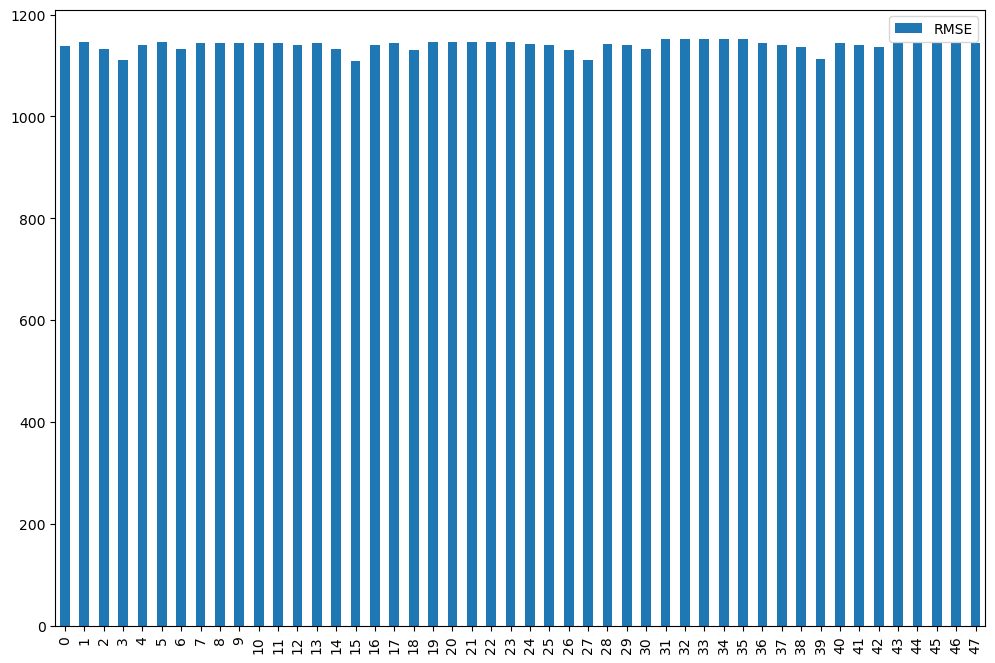

In [63]:
pred_df.plot(kind='bar',figsize=(12,8))

It has been shown in the previous result that:
1. Scaler has no obvious influence on the resulting error, so I will only apply one scaler in later attempts to save time.
2. There is still plenty room for improvements given that the RMSEs are large, so I will attempt to reshape the target variable to boost performances of the models.

In [64]:
# Instead of trying to predict the actual total delivery duration, we change the target variable to prep time
train_df['prep_time'] = train_df['actual_total_delivery_duration'] - train_df['estimated_store_to_consumer_driving_duration'] - train_df['estimated_order_place_duration']


In [65]:
scalers ={
    'Standard_scaler': StandardScaler()
}

feature_sets = {
    'selected_features_40': importances.sort_values(by='Gini-importance')[-40:].index.tolist()
}

In [66]:
for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]
    for scaler_name in scalers.keys():
        print(f'----scaled with {scaler_name}-----included columns are {feature_set_name}')
        print('')
        for model_name in regression_models.keys():
            x = train_df[feature_set].drop(columns=['estimated_store_to_consumer_driving_duration','estimated_order_place_duration'])
            y = train_df['prep_time']
            
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
            train_indices = x_train.index
            test_indices = y_train.index
            
            x_scaled, y_scaled, x_scaler, y_scaler = scale(scalers[scaler_name], x, y)
            
            x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)
            _,y_predict_scaled,_,_ = make_regression(x_train_scaled, y_train_scaled[:,0],x_test_scaled, y_test_scaled[:,0], regression_models[model_name],model_name,verbose=True)
            rmse_error, y_predict = rmse_with_inv_transform(y_scaler, y_test,y_predict_scaled,model_name)

----scaled with Standard_scaler-----included columns are selected_features_40

Train error = 0.9495503902435303 in Ridge
Test error = 1.0089346170425415 in Ridge
Error = 1141.999755859375 in Ridge
Train error = 0.9285438104207792 in DecisionTree
Test error = 0.9959306313028174 in DecisionTree
Error = 1127.2808835181734 in DecisionTree
Train error = 0.3540164771875586 in RandomForest
Test error = 1.0051359127048862 in RandomForest
Error = 1137.7002219856718 in RandomForest
Train error = 0.9170396327972412 in MLP
Test error = 0.9858672618865967 in MLP
Error = 1115.8902587890625 in MLP


MLP has the best performance, so I will choose it as the best-performing model. By calculating the errors sololy based on this model, I can extract the predictions.

In [67]:
scalers ={
    'Standard_scaler': StandardScaler()
}

feature_sets = {
    'selected_features_40': importances.sort_values(by='Gini-importance')[-40:].index.tolist()
}

regression_models = {
    'MLP': MLPRegressor()
}

feature_set = feature_sets['selected_features_40']
x = train_df[feature_set].drop(columns=['estimated_store_to_consumer_driving_duration','estimated_order_place_duration'])
y = train_df['prep_time']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
train_indices = x_train.index
test_indices = x_test.index

x_scaled, y_scaled, x_scaler, y_scaler = scale(scalers['Standard_scaler'], x, y)

x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)
_,y_predict_scaled,_,_ = make_regression(x_train_scaled, y_train_scaled[:,0],x_test_scaled, y_test_scaled[:,0], regression_models['MLP'],'MLP',verbose=True)
rmse_error, y_predict = rmse_with_inv_transform(y_scaler, y_test,y_predict_scaled,'MLP')

Train error = 0.9139778017997742 in MLP
Test error = 0.9826032519340515 in MLP
Error = 1112.19580078125 in MLP


In [68]:
pred_values_dict = {
    'actual_total_delivery_duration': train_df['actual_total_delivery_duration'][test_indices].values.tolist(),
    'prep_duration_prediction': y_predict[:,0].tolist(),
    'estimated_store_to_consumer_driving_duration': train_df['estimated_store_to_consumer_driving_duration'][test_indices].values.tolist(),
    'estimated_order_place_duration': train_df['estimated_order_place_duration'][test_indices].values.tolist()
}

In [69]:
values_df = pd.DataFrame(pred_values_dict)
values_df

,actual_total_delivery_duration,prep_duration_prediction,estimated_store_to_consumer_driving_duration,estimated_order_place_duration
0,2448.0,1919.157227,380.0,251.0
1,1839.0,1334.609253,747.0,446.0
2,1927.0,2076.922607,543.0,251.0
3,2657.0,1331.933228,445.0,251.0
4,3596.0,1978.742432,691.0,446.0
...,...,...,...,...
35409,9557.0,2856.383057,768.0,446.0
35410,1864.0,2198.180664,324.0,446.0
35411,2674.0,1835.236694,791.0,251.0
35412,2234.0,1907.572876,687.0,251.0


In [70]:
values_df['sum_total_delivery_duration'] = values_df['prep_duration_prediction'] + values_df['estimated_store_to_consumer_driving_duration'] + values_df['estimated_order_place_duration']
values_df

,actual_total_delivery_duration,prep_duration_prediction,estimated_store_to_consumer_driving_duration,estimated_order_place_duration,sum_total_delivery_duration
0,2448.0,1919.157227,380.0,251.0,2550.157227
1,1839.0,1334.609253,747.0,446.0,2527.609253
2,1927.0,2076.922607,543.0,251.0,2870.922607
3,2657.0,1331.933228,445.0,251.0,2027.933228
4,3596.0,1978.742432,691.0,446.0,3115.742432
...,...,...,...,...,...
35409,9557.0,2856.383057,768.0,446.0,4070.383057
35410,1864.0,2198.180664,324.0,446.0,2968.180664
35411,2674.0,1835.236694,791.0,251.0,2877.236694
35412,2234.0,1907.572876,687.0,251.0,2845.572876


In [71]:
mean_squared_error(values_df['actual_total_delivery_duration'], values_df['sum_total_delivery_duration'], squared=False)

1112.1957659145305

We have obtained the results from the MLP model in this step. There are definitely more rooms for improvements, but the current model is good enough in practice.